In [1]:
from iohblade.loggers import ExperimentLogger
from iohblade import plot_convergence, plot_experiment_CEG
import os

logger = ExperimentLogger('../results/automl-breast-cancer-1', True)

In [2]:
methods, problems = logger.get_methods_problems()
print(methods)
print(problems)

['LLaMEA']
['AutoML-breast_cancer']


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = logger.get_problem_data(problem_name='AutoML-breast_cancer')
print(data)

                                      id   fitness  \
0   5d42095b-1745-4217-96cb-eba85c5c952a  0.944056   
1   80b4d87a-aac5-466d-bb3c-130b0fb88714  0.958042   
2   6a28ab4e-8857-45bd-ad65-b6ff20ecd606  0.594406   
3   c7cb5bd3-83d2-464a-bd06-98ef46b74092  0.965035   
4   06c39aa8-70ca-4b56-9dc4-976f10cf70e5      -inf   
..                                   ...       ...   
95  82b7be4d-cf6d-4216-a2fa-f1680359b8ac      -inf   
96  01014e48-09c3-4ef3-bf12-a202f86925d9  0.384615   
97  1ec2b53f-20d7-47d6-ade8-f970cd80ffc8      -inf   
98  16541f15-8182-409a-9bd5-a1c13ed7000a      -inf   
99  9ebb3a0a-dd27-403e-98c0-3850e4a3d36d  0.972028   

                              name  \
0              FeatureSelectionSVC   
1       StackingClassifierPipeline   
2                 PCA_SVC_Pipeline   
3   EnsembleBreastCancerClassifier   
4                 RFECV_GaussianNB   
..                             ...   
95  EnsembleBreastCancerClassifier   
96  EnsembleBreastCancerClassifier   
97  Ensem

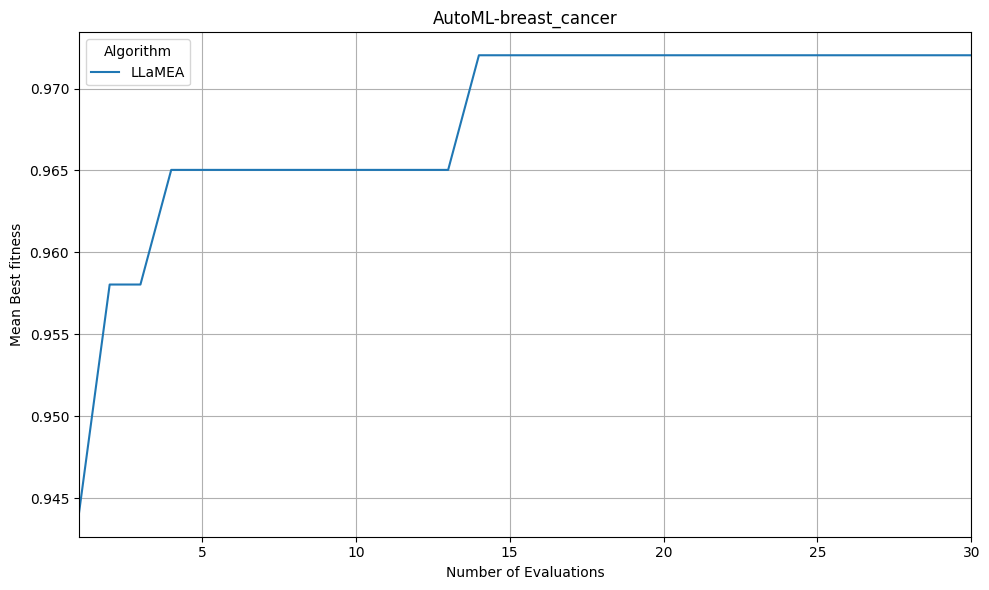

13
import numpy as np
import sklearn
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

class EnsembleBreastCancerClassifier:
    "Enhanced ensemble with optimized hyperparameters, bagging for robustness, and adaptive weighting based on individual classifier performance."

    def __init__(self, X, y):
        self.model = self.train(X, y)

    def train(self, X, y):
        # Define the models with optimized hyperparameters
        lr_model = LogisticRegression(random_state=42, solver='liblinear', penalty='l1', C=0.01) # Further reduce C for stronger regularization
        rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=7, min_samples_split=5

In [5]:
import numpy as np
import json


plot_convergence(logger, metric="fitness", save=False, budget=30)
data = logger.get_problem_data(problem_name='AutoML-breast_cancer')
idx = data['fitness'].idxmax()
print(idx)
print(data.iloc[idx]['code'])